In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.cmap'] = 'inferno'

## Predicciones Basadas en un Auto Regresor

In [3]:
prices = pd.read_csv('./dataset/prices_nyse.csv', index_col=0, parse_dates=True)
prices = prices[['AAPL']]

def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]
    
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

def replace_outliers(series):
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    series[this_mask] = np.nanmedian(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)

In [4]:
shifts = np.arange(1, 11).astype(int)
shifted_data = {"lag_{}_day".format(day_shift): prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}
prices_perc_shifted = pd.DataFrame(shifted_data)

In [5]:
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

n = 500

X_train = X[:-n]
y_train = y[:-n]

X_test = X[-n:]
y_test = y[-n:]

In [6]:
from sklearn.linear_model import Ridge

In [7]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

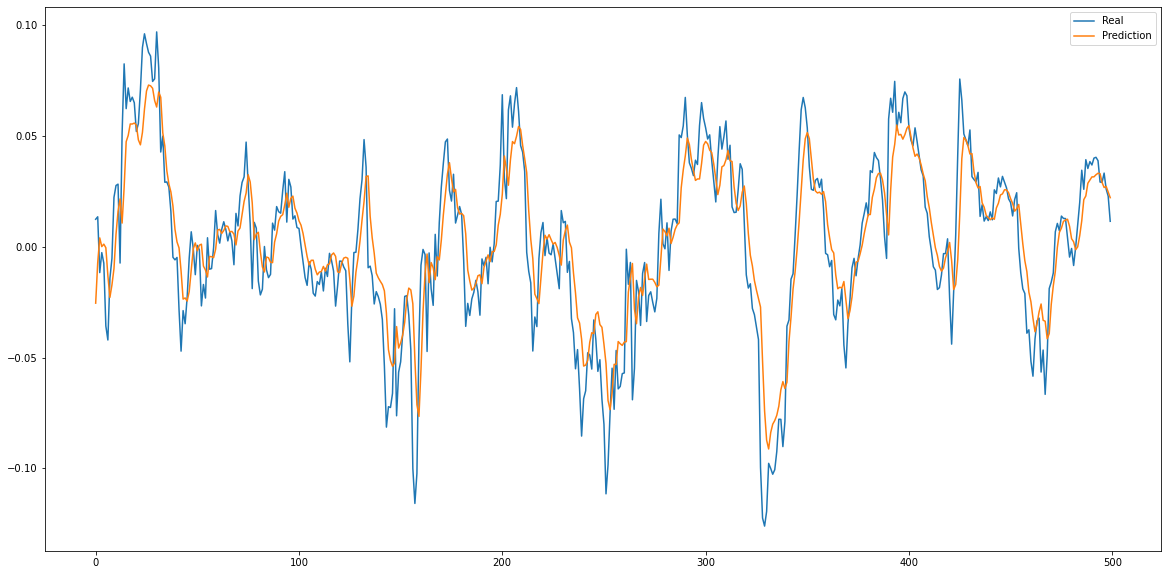

In [8]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

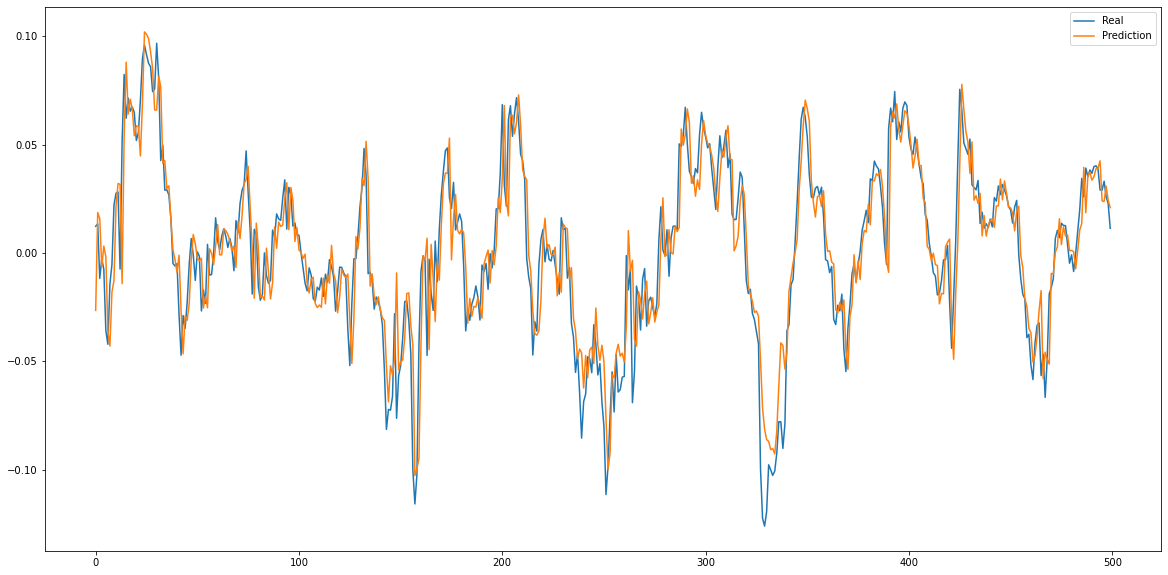

In [11]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [12]:
from sklearn.neural_network import MLPRegressor

In [13]:
model = MLPRegressor()
model.fit(X_train, y_train)

MLPRegressor()

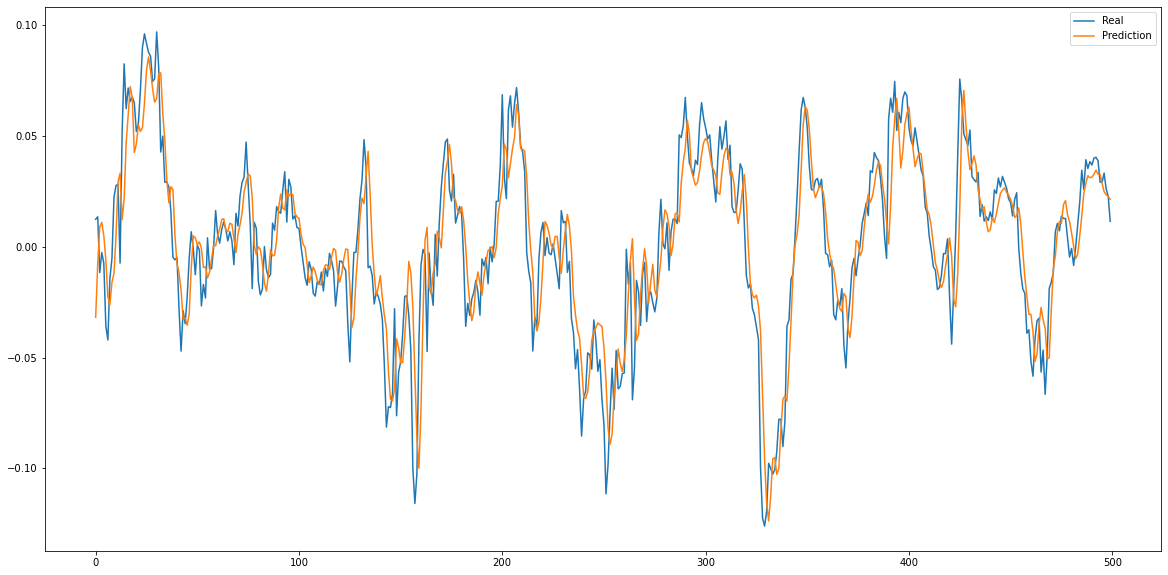

In [14]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

## Predicciones Basadas en Combinación de otras Acciones